# **Simple Linear Regression**
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/ccdsiub/ml-essentials/blob/master/docs/supervised-learning/regression/linear-regression.ipynb)

## **Problem Statement**

In this notebook, we will predict sales revenue for a given advertising budget using a simple linear regression model. For this purpose, we will use the kaggle dataset [Advertising.csv](https://www.kaggle.com/ashydv/advertising-dataset). The dataset consists of 200 rows of data, each representing a market with the following attributes:

- `TV`: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- `Radio`: advertising dollars spent on Radio
- `Newspaper`: advertising dollars spent on Newspaper
- `Sales`: sales of a single product in a given market (in thousands of widgets)

We will try to predict sales using the three other features.

## **Import necessary packages**

We will use the following packages for this tutorial:

- `pandas` to load and manipulate data
- `numpy` to work with arrays of data
- `matplotlib` and `seaborn` for plotting and visualization
- `sklearn` for machine learning and data analysis tools

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

## **Load the data**

Download the dataset from [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/ccdsiub/ml-essentials/blob/master/docs/supervised-learning/regression/datasets/Advertising.csv). Click on the folder icon on the left panel of colab and create a folder named `datasets`. Then upload the dataset to the `datasets` folder.

We will use the `pd.read_csv()` function to read the dataset into a pandas dataframe. We will also use the `head()` function to display the first five rows of the dataframe.

In [2]:
data = pd.read_csv('datasets/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## **Explor the data**

At first, we will try to understand the data by exploring it. We will use the `info()` function to get a brief information about the dataframe.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


From the output, we can see that the dataframe has 200 rows and 4 columns. The columns are named `TV`, `Radio`, `Newspaper`, and `Sales`. The `Sales` column is the target variable and the other three columns are the features. The `info()` function also shows that there are no missing values (null values) in the dataframe and all the values are numerical (float64).

Next, we will use the `describe()` function to get some statistical information about the dataframe.

In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


From the output, we can see that the average sales revenue is 15.13 thousand dollars with a standard deviation of 5.29 thousand dollars. The minimum sales revenue is 1.6 thousand dollars and the maximum sales revenue is 27 thousand dollars. The average advertising budget for TV, Radio, and Newspaper are 147, 23, and 30 thousand dollars respectively.

Also, we got a brief idea about the distribution of the data from the `describe()` function. For example, the maximum advertising budget for TV is 296 thousand dollars and the minimum is 0.7 thousand dollars. The average advertising budget for TV is 147 thousand dollars and the standard deviation is 85 thousand dollars. The 25th percentile, 50th percentile, and 75th percentile values are 74, 149, and 218 thousand dollars respectively meaning that 25% of the markets have an advertising budget of less than 74 thousand dollars, 50% of the markets have an advertising budget of less than 149 thousand dollars, and 75% of the markets have an advertising budget of less than 218 thousand dollars for TV. The same information can be obtained for the other features.

## **Visualize the data**

To get a better understanding of the data, we will visualize it using the `matplotlib` and `seaborn` packages.

### **Boxplot**
At first we will draw a boxplot for each of the features to get an idea about the distribution of the data and to identify any outliers.

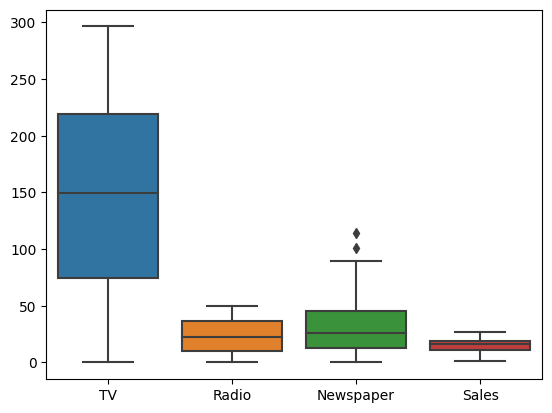

In [5]:
sns.boxplot(data=data, orient='v')
plt.show()

From the boxplots, we can see that there are two outliers in the `Newspaper` feature. The outliers are the two points above the maximum value. We will remove these two points from the dataset.

### **Remove outliers**

We will use update the dataframe by taking only the rows where the budget for `Newspaper` is less than 90 thousand dollars, as the outliers are above 90 thousand dollars.

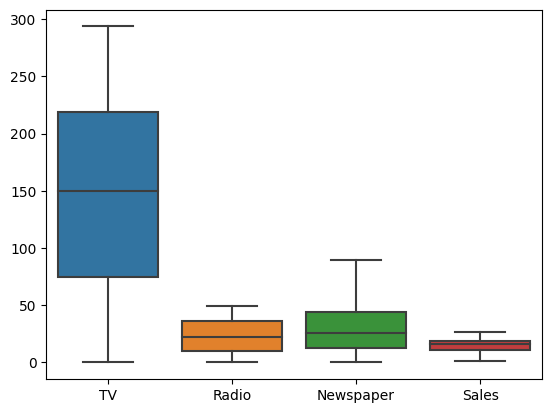

In [6]:
data = data[data['Newspaper'] < 90]
sns.boxplot(data=data, orient='v')
plt.show()

From the boxplots, we can see that there are no outliers in the `Newspaper` feature.

### **Pairplot**

Next, we will draw a pairplot to visualize the relationship between the features and the target variable. The pairplot will also show the correlation between the features and the distribution of the data.

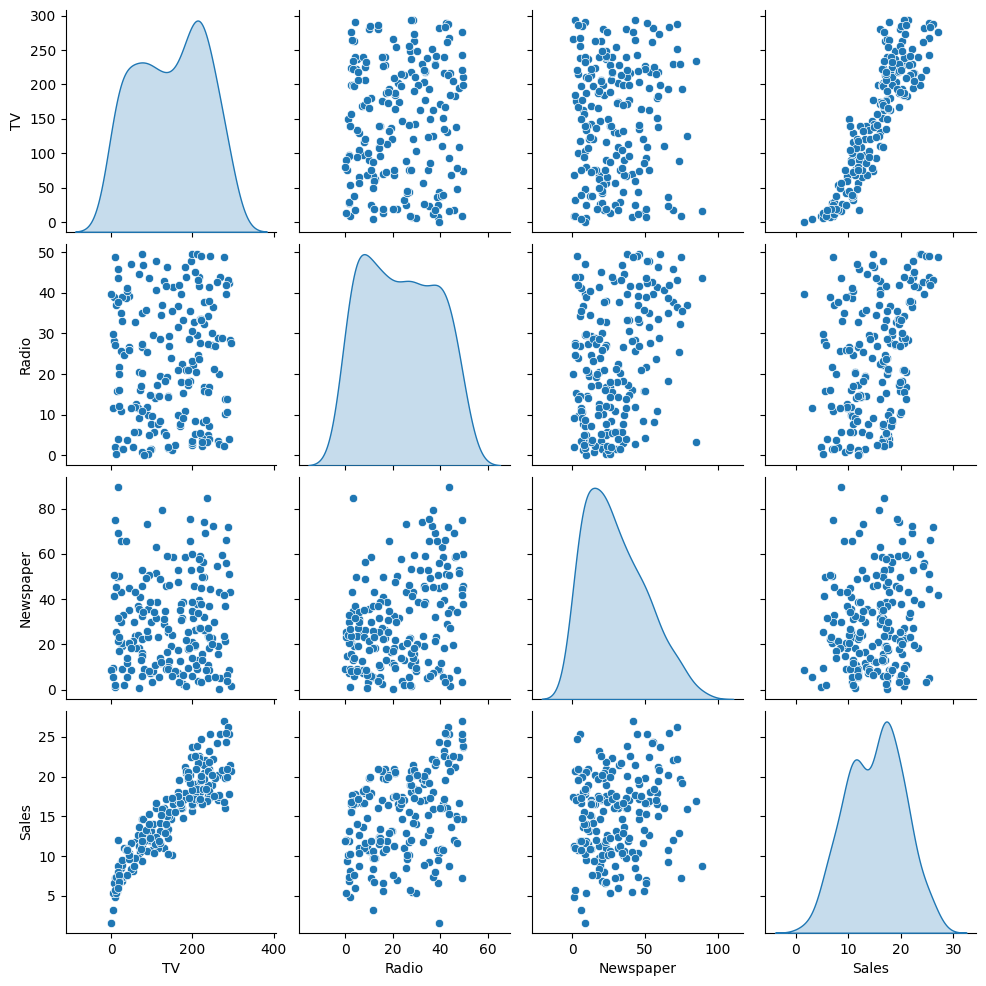

In [7]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

From the pairplot, we can conclude the following:

- No or very little linear relationship between TV and Radio
- Low linear relationship between TV and Newspaper
- Moderate linear relationship between Radio and Newspaper
- High linear relationship between TV and Sales, Radio and Sales, and Newspaper and Sales
- A small curvilnear relationship between TV and Sales as well as Radio and Sales


### **Correlation matrix**

To get a numerical idea about the correlation between the features and the target variable, we will draw a correlation matrix.

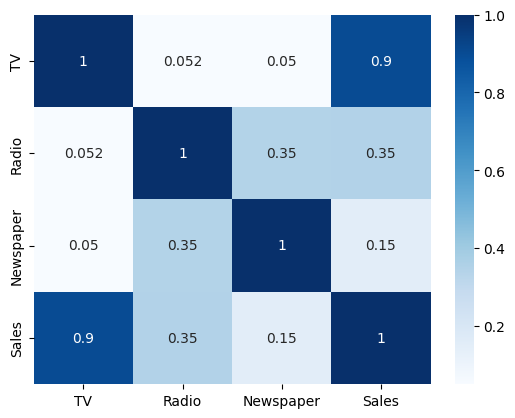

In [8]:
matrix = data.corr()
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.show()

This plot further quantifies the relationship between the features and the target variable, and confirms our observations from the pairplot.

## **Prepare the data**

Before we can train a machine learning model, we need to prepare the data by splitting it into training and test sets. We will use the training set to train the model and the test set to evaluate the model.

### **Split the data**

We will use the `train_test_split()` function from the `sklearn.model_selection` module to split the data into training and test sets. We will use 80% of the data for training and 20% for testing. We will also set the `random_state` parameter to 42 to ensure that the data is split in the same way every time we run the code. You can use any number for the `random_state` parameter.

In [9]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

## **Train the model**

We have three features in our dataset: `TV`, `Radio`, and `Newspaper`. So, we will use each of these features onece as the independent variable and the `Sales` feature as the dependent variable to train three different models. We will have the following three models:

- `model1`: Predict `Sales` using `TV` as the independent variable
- `model2`: Predict `Sales` using `Radio` as the independent variable
- `model3`: Predict `Sales` using `Newspaper` as the independent variable

We will use the `LinearRegression()` function from the `sklearn.linear_model` module to train the models.

### **Train `model1`**

First, we will train `model1` using the `TV` feature as the independent variable and the `Sales` feature as the dependent variable.

We will use the `fit()` function to train the model. The `fit()` function takes two parameters: the independent variable and the dependent variable.

In [16]:
train_x = train['TV'].values.reshape(-1, 1)
train_y = train['Sales']

model = LinearRegression()

model.fit(train_x, train_y)

print('Intercept: ', model.intercept_)
print('Coefficients: ', model.coef_)
print('R2 score: ', model.score(train_x, train_y))

Intercept:  7.023771157863246
Coefficients:  [0.05495032]
R2 score:  0.8066457506445244


Here, we can see that the coefficient of the `TV` feature is 0.05 and the intercept is 7.02. So, the equation of the line is:

$$Sales = 7.02 + 0.05 \times TV$$

The $R^2$ value is 0.81. This means that 81% of the variation in the `Sales` feature can be explained by the `TV` feature. The $R^2$ value is also known as the coefficient of determination.

### **Train `model2`**

Next, we will train `model2` using the `Radio` feature as the independent variable and the `Sales` feature as the dependent variable.

In [17]:
train_x = train['Radio'].values.reshape(-1, 1)
train_y = train['Sales']

model = LinearRegression()

model.fit(train_x, train_y)

print('Intercept: ', model.intercept_)
print('Coefficients: ', model.coef_)
print('R2 score: ', model.score(train_x, train_y))

Intercept:  12.394630841514903
Coefficients:  [0.12071007]
R2 score:  0.11907408678845499


In this case, the coefficient of the `Radio` feature is 0.12 and the intercept is 12.39. So, the equation of the line is:

$$Sales = 12.39 + 0.12 \times Radio$$

The $R^2$ value is 0.12. This means that only 12% of the variation in the `Sales` feature can be explained by the `Radio` feature.

### **Train `model3`**

Next, we will train `model3` using the `Newspaper` feature as the independent variable and the `Sales` feature as the dependent variable.

In [18]:
train_x = train['Newspaper'].values.reshape(-1, 1)
train_y = train['Sales']

model = LinearRegression()

model.fit(train_x, train_y)

print('Intercept: ', model.intercept_)
print('Coefficients: ', model.coef_)
print('R2 score: ', model.score(train_x, train_y))

Intercept:  13.761521914426758
Coefficients:  [0.04705226]
R2 score:  0.03504929986243044


From the output, we can see that the coefficient of the `Newspaper` feature is 0.05 and the intercept is 13.76. So, the equation of the line is:

$$Sales = 13.76 + 0.05 \times Newspaper$$

The $R^2$ value is 0.03, which is very low. This means that only 3% of the variation in the `Sales` feature can be explained by the `Newspaper` feature.

From the above analysis, we can conclude that `TV` is the best predictor of `Sales` followed by `Radio` and `Newspaper`, as the $R^2$ value is the highest for `TV` and the lowest for `Newspaper` suggesting that `TV` explains the most variation in `Sales` and `Newspaper` explains the least variation in `Sales`. So, we will use `TV` as the independent variable and `Sales` as the dependent variable to train the model.

In [ ]:
model = LinearRegression()

train_x = train['TV'].values.reshape(-1, 1)
train_y = train['Sales']

model.fit(train_x, train_y)

m = model.coef_[0]
b = model.intercept_

Now, we will visualize the line of best fit line for `model1` using the `TV` and `Sales` features. We will use the `scatterplot()` function from the `seaborn` package to draw the scatter plot and the `lineplot()` function from the `seaborn` package to draw the line of best fit. We will also add a text box to display the equation of the line.

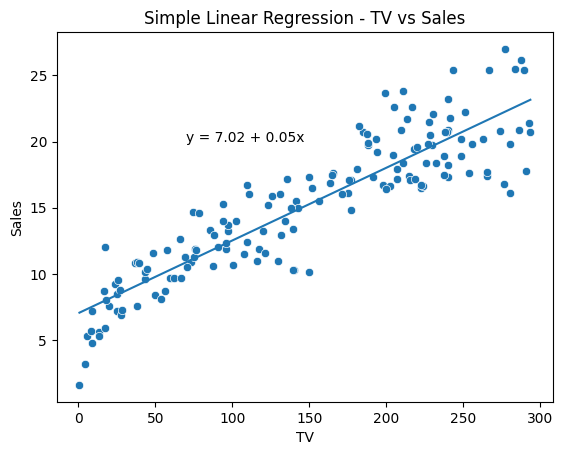

In [42]:
sns.scatterplot(x=train_x.reshape(-1), y=train_y)
sns.lineplot(x=train_x.reshape(-1), y=m*train_x.reshape(-1) + b)

plt.title('Simple Linear Regression - TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
equation = 'y = ' + str(round(b, 2)) + ' + ' + str(round(m, 2)) + 'x'
plt.annotate(equation, xy=(70, 20), fontsize=10)
plt.show()

## **Evaluate the model**

Now, we will evaluate the model using the test set. We will use the `predict()` function to predict the `Sales` values for the test set using the `TV` values in the test set. We will then compare the predicted `Sales` values with the actual `Sales` values in the test set to evaluate the model. 

There are several metrics that can be used to evaluate a regression model. You can read more about these metrics [here](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics). We will use the following metrics to evaluate the model:

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Coefficient of Determination ($R^2$)

For, first three matrices the lower the value, the better the model. For the coefficient of determination, the higher the value, the better the model.

In [41]:
test_x = test['TV'].values.reshape(-1, 1)
test_y = test['Sales']

pred_y = model.predict(test_x)

mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, pred_y)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)

MAE:  1.822663774852425
MSE:  4.948104585614338
RMSE:  2.224433542638291
R2:  0.8217997347359163


From the results, we can see that the MAE is 1.82, the MSE is 4.94, the RMSE is 2.22, and the $R^2$ value is 0.82. This means that the model is able to predict the `Sales` values with an error of 1.82 units on average, the predicted `Sales` values are 4.94 units away from the actual `Sales` values on average. The $R^2$ value is 0.82, which means that 82% of the variation in the `Sales` feature can be explained by the `TV` feature. In some engineering disciplines, an equation fitted to data is acceptable only if $R^2 > 0.90$. Other engineering disciplines might find an $R^2$ as low as 0.70 acceptable for use. So, it depends on the application. In this case, we can say that the model is acceptable for use, but not great as the $R^2$ value is not very high (it is not very close to 1) and the errors are not very low either.

Next, we will visualize the fit of the model on the test set.

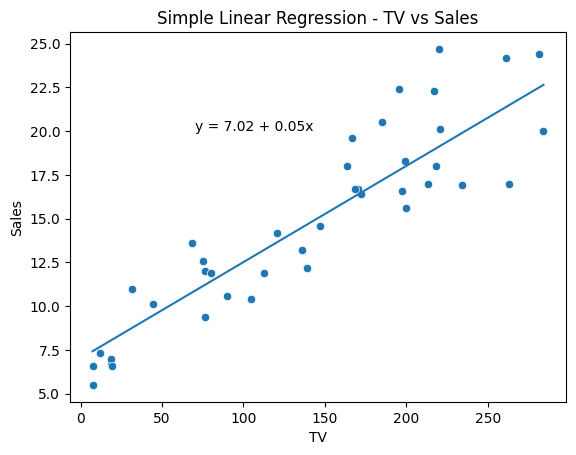

In [43]:
sns.scatterplot(x=test_x.reshape(-1), y=test_y)
sns.lineplot(x=test_x.reshape(-1), y=pred_y)

plt.title('Simple Linear Regression - TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.annotate(equation, xy=(70, 20), fontsize=10)
plt.show()

From the plot, we can see that the model is able to capture the general trend in the data. To further investigate the fit of the model, we will plot the residuals. The residuals are the difference between the actual `Sales` values and the predicted `Sales` values. We will use the `residplot()` function from the `seaborn` package to plot the residuals.

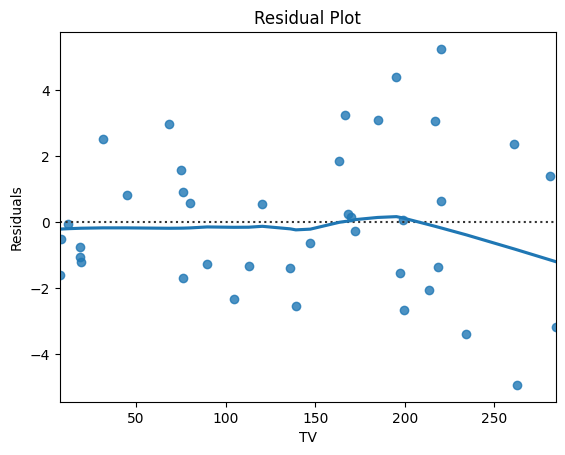

In [46]:
sns.residplot(x=test_x.reshape(-1), y=test_y - pred_y, lowess=True)

plt.title('Residual Plot')
plt.xlabel('TV')
plt.ylabel('Residuals')
plt.show()

From the plot, we can see that the residuals are randomly distributed around zero. 